## Reading and Understanding the Data


#### Import Relevant data manipulation Libraries

In [1]:
# Import important data manipulation Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import relevant libraries for LR Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Import libraries for model evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#### Read Data

In [ ]:
# # Connect with google drive ( Since working within colab)
# from google.colab import drive
# drive.mount('/content/drive')

# %cd drive/MyDrive/'Colab Notebooks'/upgrad_MS/upgrad_case_study/Bike_Sharing/

In [4]:
# Read day.csv, and view some sample records
day = pd.read_csv('day.csv')
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check Sample
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Check the number of rows and columns
day.shape

(730, 16)

In [7]:
# Get summary of all the numeric columns
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Check missing values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### This concludes that there is no missing values in the dataset

In [9]:
# Rename the columns to imcrease understanding
day.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
day.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Map variables as per season, month, weathersit, weekday
day['season'] = day.season.map({1: 'Spring', 2: 'Summer', 3:'Fall', 4:'Winter' })
day['month'] = day.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
day['weathersit'] = day.weathersit.map({1: 'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'})
day['weekday'] = day.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

day.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Visualisation

### Identify Continuous and Categorical Features

In [11]:
# Check the unique values in the data
day.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

### Analyse Numeric Variables

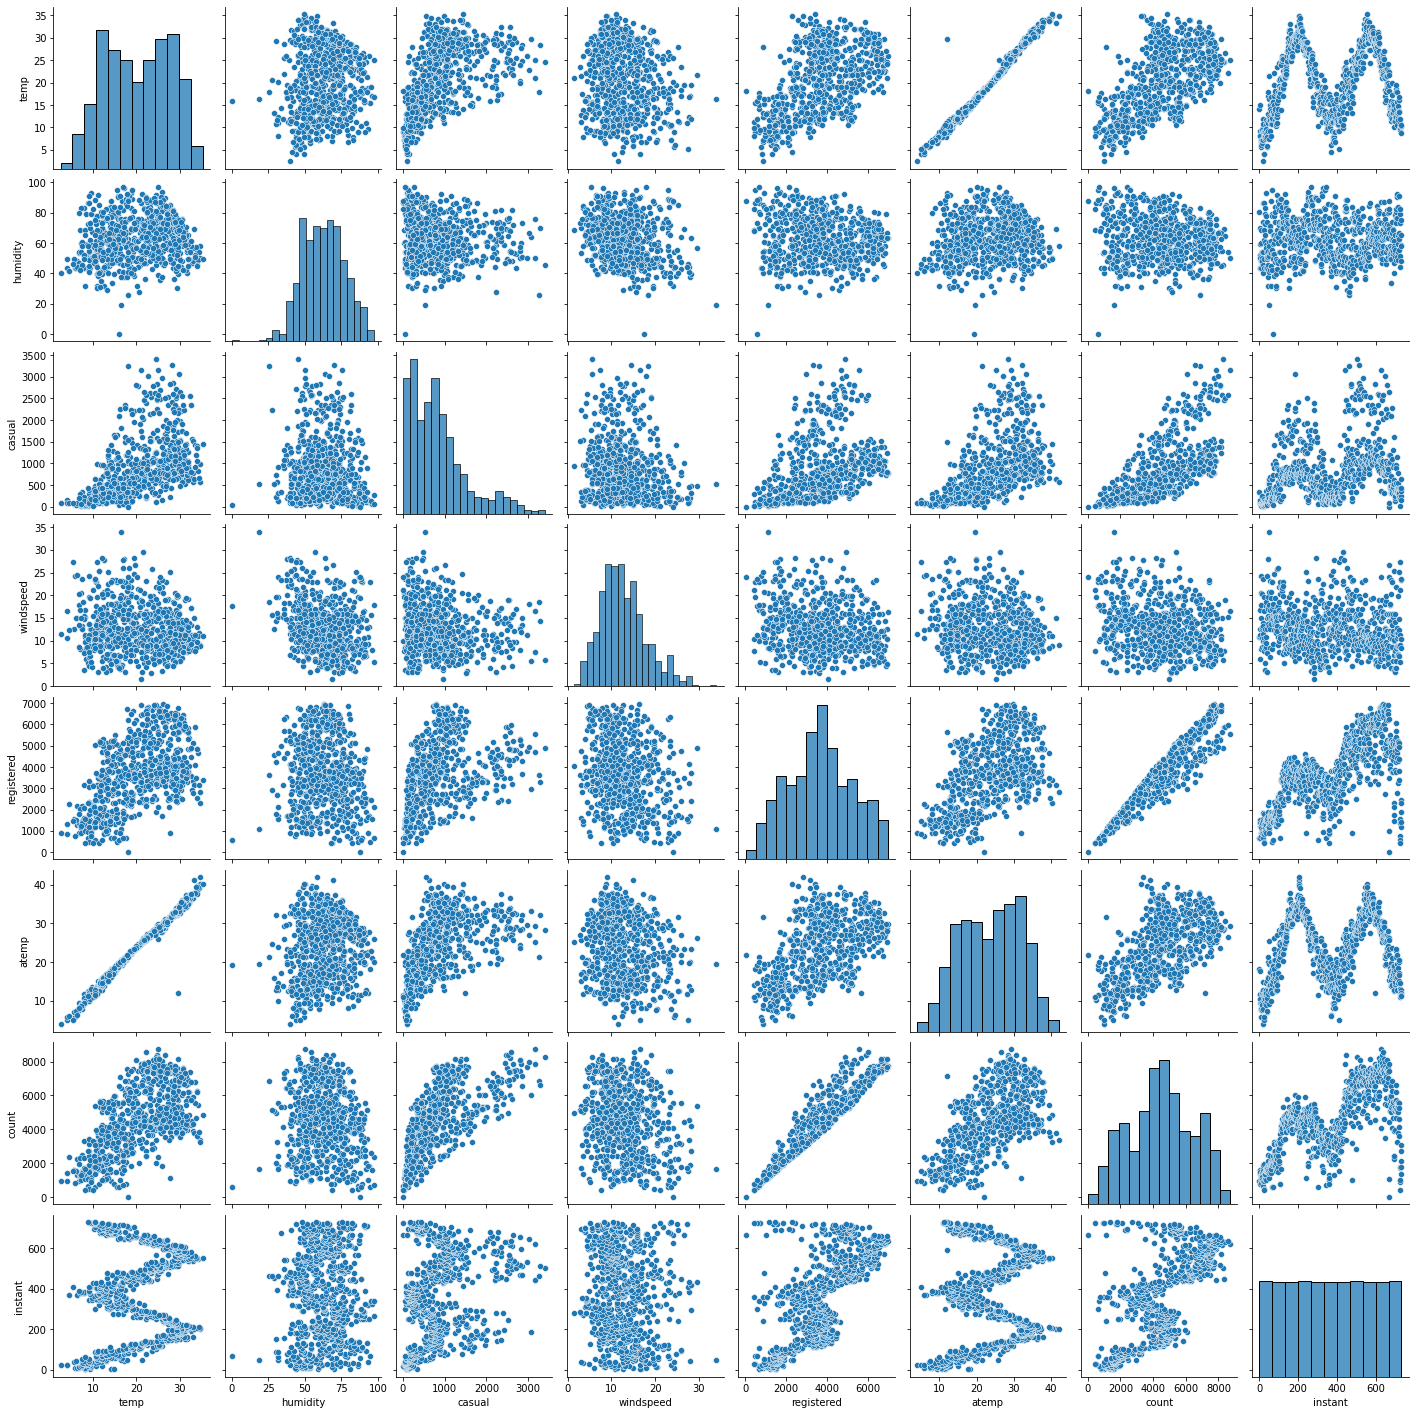

In [12]:
# Pairplot for numeric variables
sns.pairplot(day, vars = ["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

As per the pairplt, 
- Some independent variables are positively correlated to the *count* variable. 
-  Day rentals are more correlated to *temperature*



### Analyse Categorical Variables

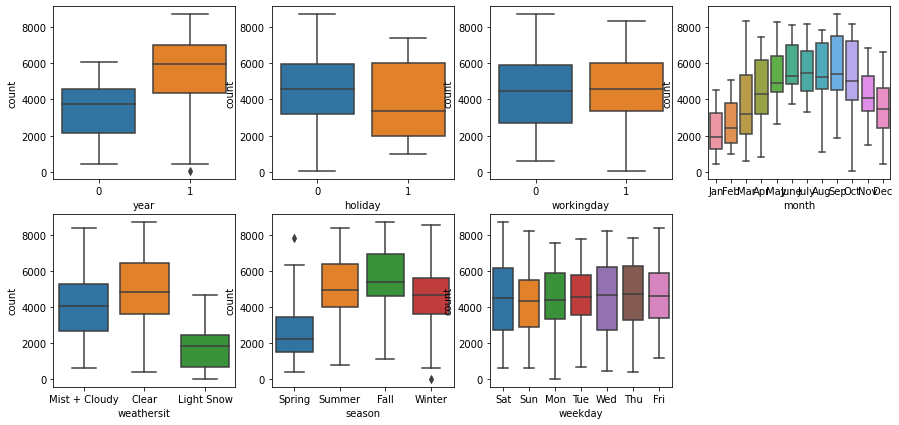

In [13]:
## Get analysis between categorical and continuous variable
plt.figure(figsize=(15, 7))

plt.subplot(2, 4, 1)
sns.boxplot(x = 'year', y = 'count', data = day)

plt.subplot(2, 4, 2)
sns.boxplot(x = 'holiday', y = 'count', data = day)

plt.subplot(2, 4, 3)
sns.boxplot(x = 'workingday', y = 'count', data = day)

plt.subplot(2, 4, 4)
sns.boxplot(x = 'month', y = 'count', data = day)

plt.subplot(2, 4, 5)
sns.boxplot(x = 'weathersit', y = 'count', data = day)

plt.subplot(2, 4, 6)
sns.boxplot(x = 'season', y = 'count', data = day)

plt.subplot(2, 4, 7)
sns.boxplot(x = 'weekday', y = 'count', data = day)

plt.show()

As per the above plots, the figures of Bike Rentals are more :
-  During the Fall season and then in summer
-  In the year 2019 compared to 2018
-  In partly cloudy weather
-  On Saturday, Wednesday and Thursday


## Univariate Data Analysis

#### Data Analysis - Season

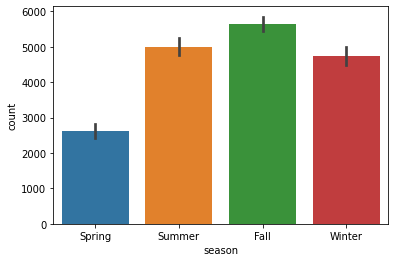

In [14]:
# Check between season and count of bike rentals

sns.barplot('season','count', data=day)
plt.show()

#### Data Analysis - Weathersit

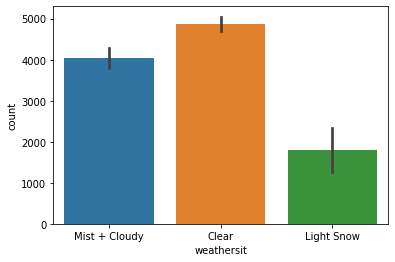

In [15]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit', 'count', data=day)
plt.show()

#### Data Analysis - Year

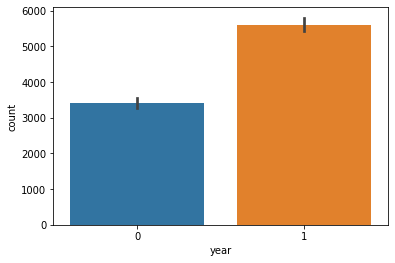

In [16]:
# Relation between Year and count of bike rentals
# year (0: 2018, 1:2019)
sns.barplot('year','count', data=day)
plt.show()

#### Data Analysis - Month

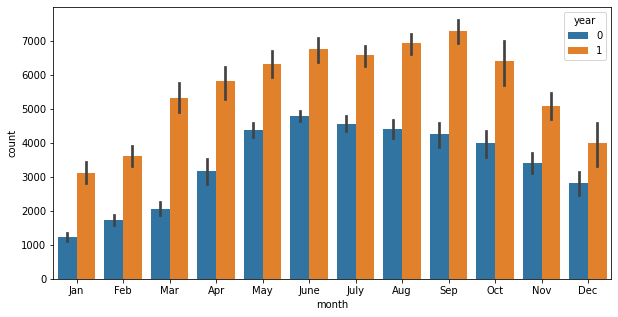

In [17]:
# Check relation between month and count of bike rentals
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year', data=day)
plt.show()

#### Data Analysis - Temperature

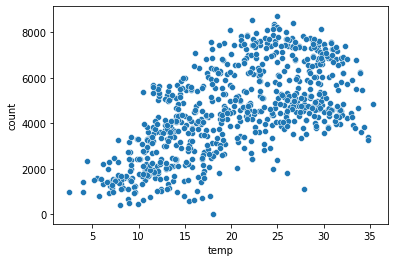

In [18]:
# Check relation between temperature and count
sns.scatterplot(x='temp', y='count', data=day)
plt.show()

#### Data Analysis - Humidity

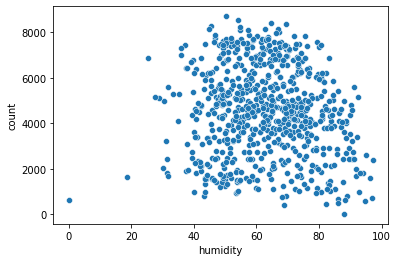

In [19]:
sns.scatterplot(x='humidity', y='count',data=day)
plt.show()

As per the Univariate Data Analysis:
- Bike are rented more during the Fall season and then in summer
- Bike are rented more in partly cloudy weather
- Bike are rented more in the year 2019 compared to 2018
- Bike Rentals are observed at higher temperatures
- Bike rentals more at high humidity

### Correlation between Variables 

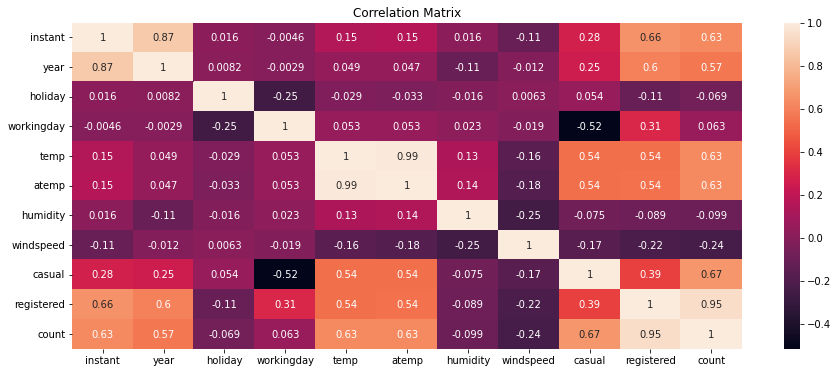

In [20]:
# Heatmap to see correlation between variables
plt.figure(figsize=(15, 6))
sns.heatmap(day.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

As per the correlation matrix:
- The variable highly correlated to *count* are *temp, atemp, casual, registered, instant*.
- With the data analysis we can identify the variables which are more useful in building the model
- From this we can Linear Regression Model.
- As per the high correlation coungt variable will be able to analyse final relationship with bike rentals, thus removing *instant, dteday, casual, registered*

#### Drop columns

In [21]:
# Drop unnecessary columns

day = day.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Checking the datatypes

In [22]:
#Checking datatypes of all the columns
day.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## Data Preparation

### One-hot encoding

In [23]:
# Perform one - hot encosing using dummy variables for month, season, weathersit, weekday
months = pd.get_dummies(day.month,drop_first=True)
weekdays = pd.get_dummies(day.weekday,drop_first=True)
weather_sit = pd.get_dummies(day.weathersit,drop_first=True)
seasons = pd.get_dummies(day.season,drop_first=True)

In [24]:
# Combining the results to the original bike dataframe
day = pd.concat([months,weekdays,weather_sit,seasons,day],axis=1)
day.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [25]:
# Drop 'season', 'month', 'weekday', 'weathersit' 

day.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
day.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [26]:
# Get number of rows and columns
day.shape

(730, 29)

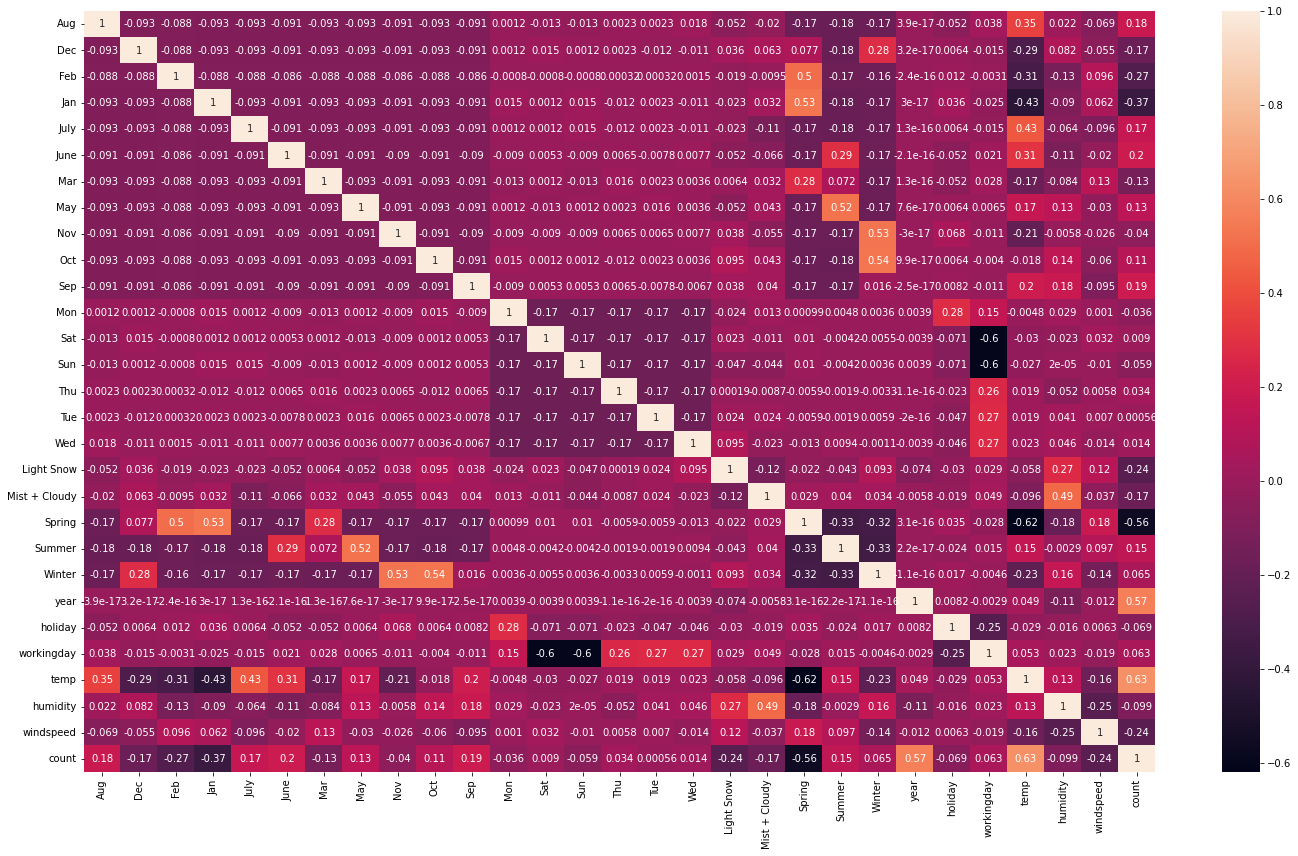

In [27]:
# Check the correlation between variables again

plt.figure(figsize=(24, 14))
sns.heatmap(day.corr(), annot = True)
plt.show()


As per the correlation matrix:
- *Temperature, summer season, June to october months* have high correlation with the *count* variable, & thus have good influence on the number of bike rentals.

## Train - Test Data split

In [28]:
# Get train and test data 
day_train, day_test = train_test_split(day, train_size = 0.7, random_state = 100)

In [29]:
# Check rows and columns after split
print(day_train.shape)
print(day_test.shape)

(510, 29)
(220, 29)


Since it is important that all the variables are on the same scale for the model to be easily interpretable. to achieve this we can use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 

##### Min-Max scaling

In [30]:
# Initiate minmaxscaler object
scaler = MinMaxScaler()

# Create a list of numerical variables
num_vars = ['temp','humidity','windspeed','count']
 
# Fit on data
day_train[num_vars] = scaler.fit_transform(day_train[num_vars])
day_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [31]:
# Check numerical variables(min and max) after scaling
day_train.describe()

# We can check that all the numerical variables are now mapped between 0 and 1

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


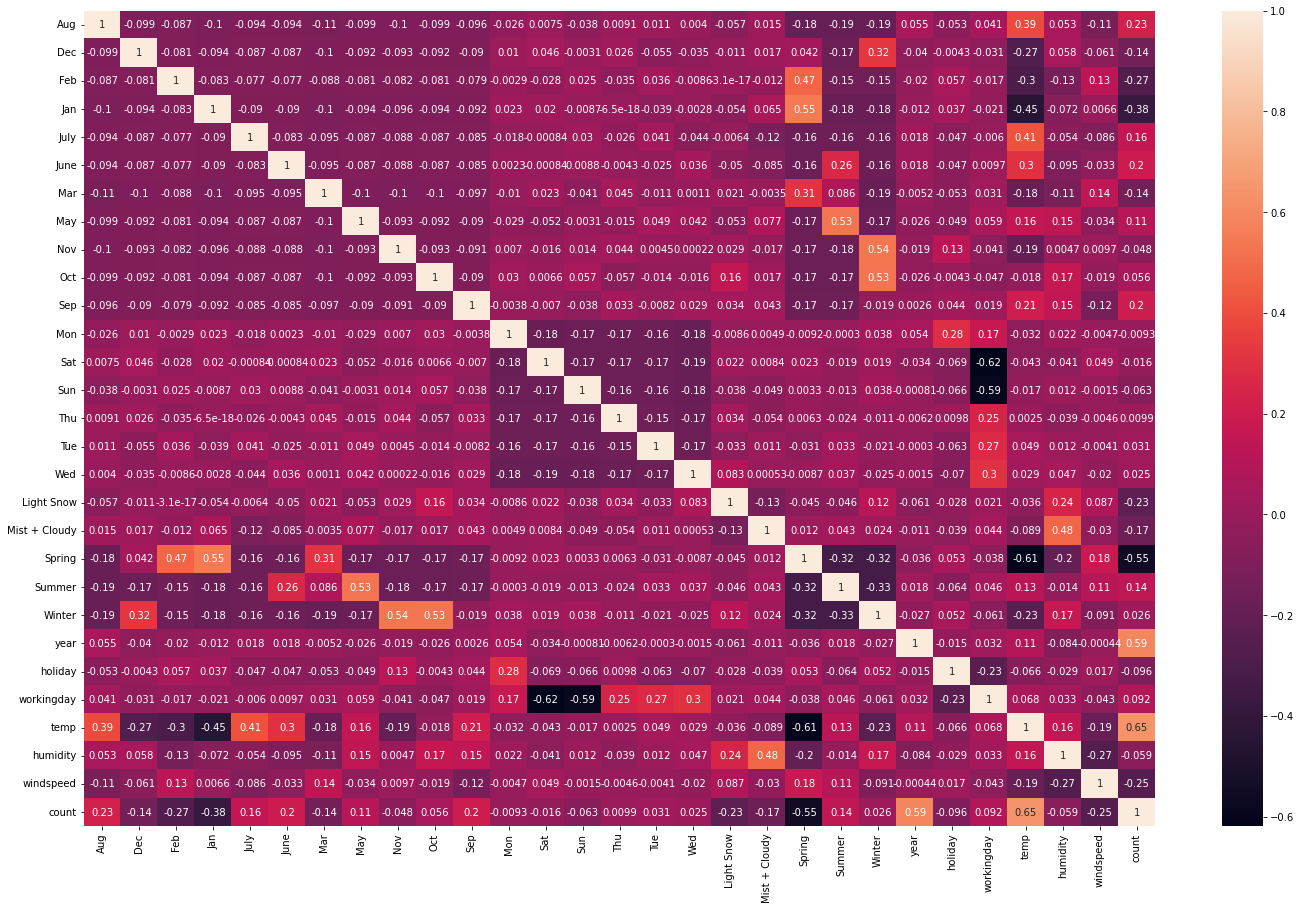

In [32]:
# As per the concept of multicollinearity assumes that predictors are not correlated with each other. If there is correlation among the predictors. Thus, Let's check the 
# correlation coefficients to see which variables are highly correlated after scaling

plt.figure(figsize=(24, 15))
sns.heatmap(day_train.corr(), annot = True)
plt.show()

# Here we have low to no multicollinearity among predictors. Also, the temp, year is correlated to the count variable. Even in August, September months 
# we can see the counts are little high.

In [33]:
# Divide the data into X and y sets
y_train = day_train.pop('count')
X_train = day_train

## Building a Linear Regression model

### RFE (Recursive Feature Elimination)

In [34]:
# Running RFE with the output number of the variable equal to 15
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator = lr_model, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [35]:
# Get list of variables selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 11),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 8),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [36]:
# Get columns where RFE support is True
cols = X_train.columns[rfe.support_]
cols

Index(['July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'Spring',
       'Summer', 'Winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [37]:
# Check colums where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model

In [38]:
# Create X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [39]:
# Add a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
# Run the linear regression model 
lr_model = sm.OLS(y_train,X_train_rfe).fit()

In [41]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          2.11e-191
Time:                        19:09:03   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

### Checking VIF

It gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:
###### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [42]:
# Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [43]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,50.68
2,Sat,12.20
3,Sun,11.79
6,Spring,5.02
12,temp,3.62
8,Winter,3.49
10,holiday,2.91
7,Summer,2.62
13,humidity,1.91
5,Mist + Cloudy,1.57


In [44]:
X_train_rfe.columns

Index(['July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'Spring',
       'Summer', 'Winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

##### Rebuilding the model without 'workingday'

In [45]:
#Drop workingday
X_train_vif1 = X_train_rfe.drop(["workingday"], axis = 1)

In [46]:
# Build a model
X_train_lr2 = sm.add_constant(X_train_vif1)
lr2 = sm.OLS(y_train, X_train_vif1).fit()
print(lr2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1234.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:09:03   Log-Likelihood:                          484.38
No. Observations:                 510   AIC:                                     -940.8
Df Residuals:                     496   BIC:                                     -881.5
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [47]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_vif1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,28.25
11,temp,16.06
13,windspeed,4.68
6,Spring,4.03
8,Winter,3.36
7,Summer,2.79
5,Mist + Cloudy,2.30
9,year,2.08
0,July,1.59
1,Sep,1.39


##### Rebuliding the model without humidity

In [48]:
#Drop the humidity column
X_train_vif2 = X_train_vif1.drop(['humidity'],axis=1)

In [49]:
# Adding a constant variable 
X_train_lr2 = sm.add_constant(X_train_vif2)
lr2 = sm.OLS(y_train,X_train_vif2).fit()
print(lr2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1332.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:09:03   Log-Likelihood:                          484.36
No. Observations:                 510   AIC:                                     -942.7
Df Residuals:                     497   BIC:                                     -887.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_vif2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.18
12,windspeed,4.63
7,Summer,2.24
6,Spring,2.13
9,year,2.07
8,Winter,1.84
0,July,1.59
5,Mist + Cloudy,1.56
1,Sep,1.34
2,Sat,1.23


Thus, we have LR-model, the VIFs and p-values both are within an acceptable range.So we go ahead and make our predictions using this model only.

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.
- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression
- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.972 or 97.2%
- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.971 or 97.1%

So our model is lr2 which is obtained by removing *workingday, and humidity variables* from the RFE support columns

## Residual Analysis of the train data

In [51]:
# Check sample data
X_train_vif2.head()

,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,temp,windspeed
576,1,0,0,0,0,0,0,0,0,1,0,0.815169,0.264686
426,0,0,1,0,0,1,1,0,0,1,0,0.442393,0.255342
728,0,0,0,1,0,0,1,0,0,1,0,0.245101,0.663106
482,0,0,1,0,0,1,0,1,0,1,0,0.395666,0.188475
111,0,0,0,0,0,1,0,1,0,0,0,0.345824,0.380981


In [52]:
#y train predicted
y_train_pred = lr2.predict(X_train_vif2)

In [53]:
%matplotlib inline

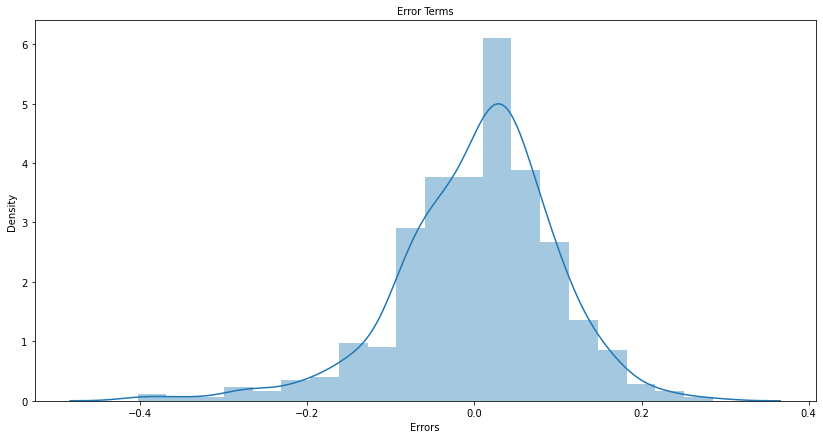

In [54]:
# Plot the histogram of the error terms
# We can see Error terms are normally distributed
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 10) 
plt.xlabel('Errors', fontsize = 10) 
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [55]:
# Create a list of numeric variables
num_vars = ['temp','humidity','windspeed','count']

# Fit on data
day_test[num_vars] = scaler.transform(day_test[num_vars])
day_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [56]:
# Divide into X_test and y_test
y_test = day_test.pop('count')
X_test = day_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [57]:
#Columns
X_train_vif2.columns

Index(['July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'Spring',
       'Summer', 'Winter', 'year', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [58]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_vif2.columns]

# Adding a constant variable 
X_test_new_ = sm.add_constant(X_test_new)
X_test_new_.head()

,const,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,Spring,Summer,Winter,year,holiday,temp,windspeed
184,1.0,1,0,0,0,0,1,0,0,0,0,1,0.831783,0.084219
535,1.0,0,0,0,0,0,0,0,1,0,1,0,0.901354,0.153728
299,1.0,0,0,0,0,0,1,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,0,0,0,1,0,0,0,0.817246,0.537414


In [59]:
# Making predictions
y_pred = lr2.predict(X_test_new)

### Finding R-squared and Adjusted R-Squared for Test set

In [60]:
#Evaluate R-square for test
round(r2_score(y_test,y_pred),4)

0.783

In [61]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.783)*(14-1)/(14-1-1)
print(round(Adj_r2, 4))

0.7649


## Model Evaluation

Text(0, 0.5, 'y_pred')

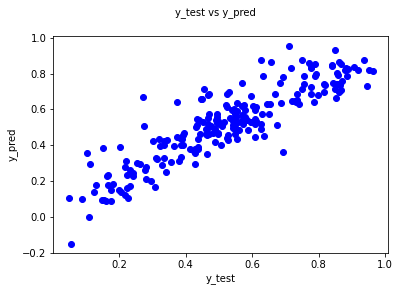

In [62]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)                          # Y-label

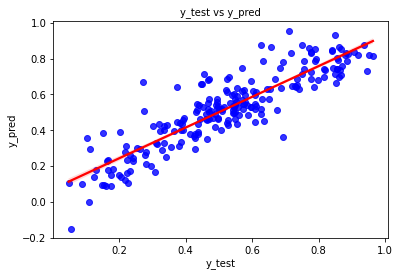

In [63]:
# Visualising the fit on the test set
# Regression plot
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)                          # Y-label
plt.show()


From the lr summary, the equation of our best fitted line is:

$ count = 0.6918 \times temp + 0.1006 \times September + 0.0179 \times Saturday + 0.0537 \times Spring + 0.1096 \times Summer  + 0.1755 \times Winter + 0.2369 \times year -0.0368 \times July - 0.0406 \times Sunday - 0.2829 \times Light snow - 0.0722 \times Mist Cloudy - 0.0977 \times holiday - 0.1011 \times windspeed $

### **Conclusion**

-  The temperature variable is having the highest coefficient 0.6918, which means if the temperature increases by one unit the number of bike rentals increases by 0.6918 units.
- Also, there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. 
- We have sunday, mist cloudy , light snow, july, holiday, and windspeed variables with negative coefficient. The coefficient value signifies how much of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.